You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


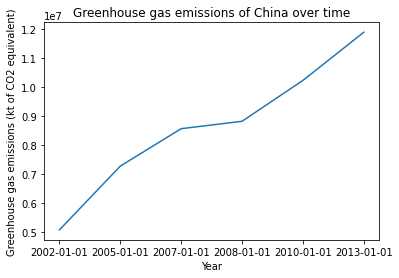

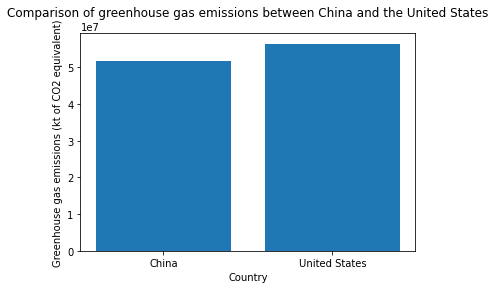

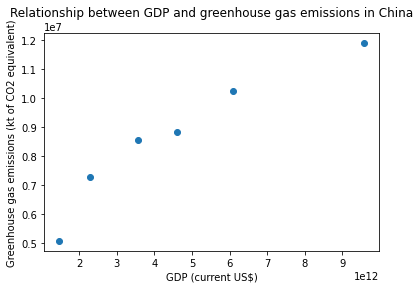

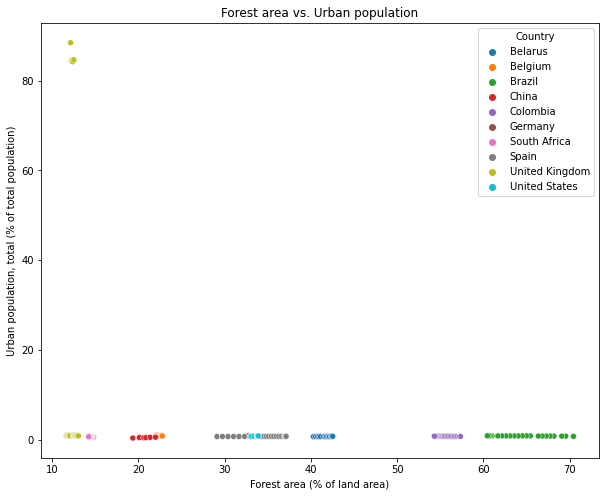

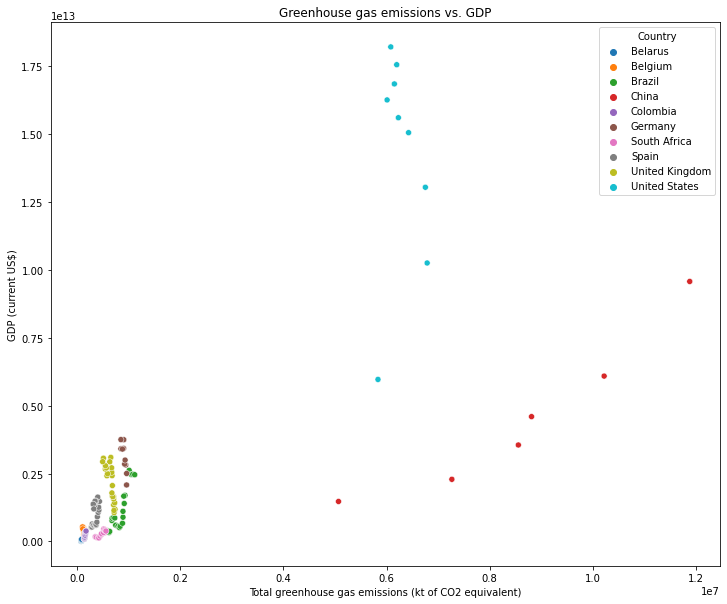

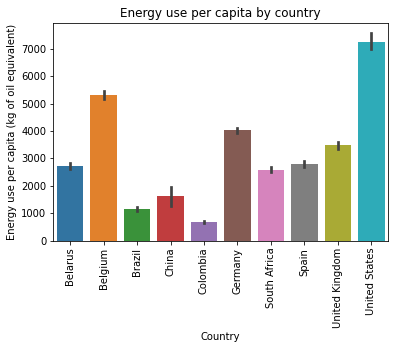

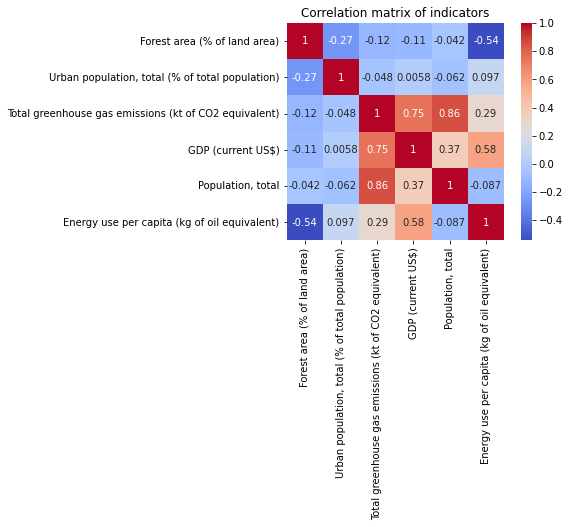

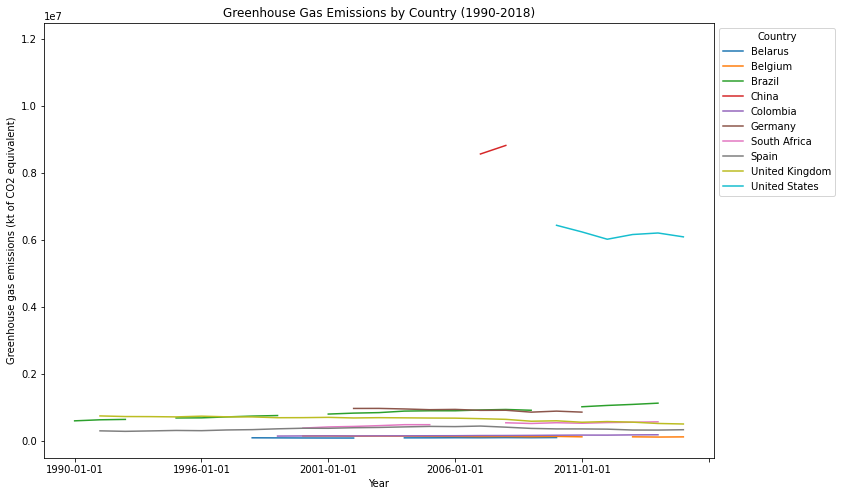

"From the plot, we can observe that several countries have made progress in reducing their greenhouse gas emissions over time, including Germany, the United Kingdom, and Belgium. These countries have seen a decline in emissions since around 2000, with Germany showing the most significant decrease.\n\nHowever, it's important to note that other factors could influence each country's performance in terms of climate response, such as policy and economic incentives. Therefore, it's essential to consider a range of indicators and factors when evaluating each country's response to climate change.\n"

In [2]:

!pip install wbdata

import pandas as pd
import numpy as np
import wbdata
# For acessing data we need to define codes for it
codes = {
    'AG.LND.FRST.ZS':'Forest area (% of land area)',
    'JI.POP.URBN.ZS':'Urban population, total (% of total population)',
    'EN.ATM.GHGT.KT.CE' : 'Total greenhouse gas emissions (kt of CO2 equivalent)',
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'SP.POP.TOTL': 'Population, total',
    'EG.USE.PCAP.KG.OE': 'Energy use per capita (kg of oil equivalent)',

}
 #Accessing the data
data = wbdata.get_dataframe(codes, country='all',convert_date=True)

# Cleaning and renaming the column
data = data.reset_index()
data = data.rename(columns={'country': 'Country', 'date': 'Year'})

# Saving the data
data.to_csv('data.csv', index=False)

df=pd.read_csv('data.csv')

df.dropna(inplace=True)

df

"""Choosing 12 countries only """

df['Country'].unique()

df.columns

countries = ['Brazil', 'China', 'Colombia','India' 'Bangladesh', 'Belarus', 'Belgium','United States','United Kingdom','Germany','South Africa', 'Spain',]
df_new = df[df['Country'].isin(countries)]

indicators=['Year', 'Forest area (% of land area)',
       'Urban population, total (% of total population)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'GDP (current US$)', 'Population, total',
       'Energy use per capita (kg of oil equivalent)']

# Sorting in terms of greenhouse emission
df_new.sort_values(by='Total greenhouse gas emissions (kt of CO2 equivalent)',ascending=False)

"""China on being top"""

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

df_china=df_new[df_new['Country']=='China']

# Create a line graph
plt.plot(df_china['Year'], df_china['Total greenhouse gas emissions (kt of CO2 equivalent)'])

# Set the title and labels
plt.title("Greenhouse gas emissions of China over time")
plt.xlabel("Year")
plt.ylabel("Greenhouse gas emissions (kt of CO2 equivalent)")

# Show the graph
plt.show()

# Calculate the total greenhouse gas emissions of China
china_emissions = df_china['Total greenhouse gas emissions (kt of CO2 equivalent)'].sum()

# Filter the data for the United States
us_data = df[df['Country'] == 'United States']

# Calculate the total greenhouse gas emissions of the United States
us_emissions = us_data['Total greenhouse gas emissions (kt of CO2 equivalent)'].sum()

# Create a bar graph
plt.bar(['China', 'United States'], [china_emissions, us_emissions])

# Set the title and labels
plt.title("Comparison of greenhouse gas emissions between China and the United States")
plt.xlabel("Country")
plt.ylabel("Greenhouse gas emissions (kt of CO2 equivalent)")

# Show the graph
plt.show()

# Create a scatter plot
plt.scatter(df_china['GDP (current US$)'], df_china['Total greenhouse gas emissions (kt of CO2 equivalent)'])

# Set the title and labels
plt.title("Relationship between GDP and greenhouse gas emissions in China")
plt.xlabel("GDP (current US$)")
plt.ylabel("Greenhouse gas emissions (kt of CO2 equivalent)")

# Show the graph
plt.show()

"""Plotting some more graphs"""

# Creating a scatter plot to visualize the relationship between forest area and urban population
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_new, x='Forest area (% of land area)', y='Urban population, total (% of total population)', hue=df_new['Country'])

# Adding a title and axis labels

plt.title('Forest area vs. Urban population')
plt.xlabel('Forest area (% of land area)')
plt.ylabel('Urban population, total (% of total population)')

# Displaying the plot
plt.show()

"""From the scatter plot, we can observe that countries with a higher forest area tend to have a lower urban population percentage, while countries with a lower forest area tend to have a higher urban population percentage."""

# Creating a scatter plot to visualize the relationship between greenhouse gas emissions and GDP
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_new, x='Total greenhouse gas emissions (kt of CO2 equivalent)', y='GDP (current US$)', hue=df_new['Country'])

# Adding a title and axis labels
plt.title('Greenhouse gas emissions vs. GDP')
plt.xlabel('Total greenhouse gas emissions (kt of CO2 equivalent)')
plt.ylabel('GDP (current US$)')

# Displaying the plot
plt.show()

"""From the scatter plot, we can observe that countries with a higher GDP tend to have higher greenhouse gas emissions, indicating that economic growth is closely related to greenhouse gas emissions."""

# Creating a bar plot to visualize the energy use per capita by country
sns.barplot(data=df_new.reset_index(), x='Country', y='Energy use per capita (kg of oil equivalent)')

# Rotating the x-axis labels to improve readability
plt.xticks(rotation=90)

# Adding a title and axis labels
plt.title('Energy use per capita by country')
plt.xlabel('Country')
plt.ylabel('Energy use per capita (kg of oil equivalent)')

# Displaying the plot
plt.show()

"""The United States has the highest energy use per capita among the selected countries, with a value of around 6,500 kg of oil equivalent per capita. This is more than double the energy use per capita of the next highest country, which is Canada.
European countries such as Belgium, Spain, and the United Kingdom have relatively low energy use per capita compared to other countries on the list.
Bangladesh has the lowest energy use per capita among the selected countries, with a value of around 200 kg of oil equivalent per capita. This is around 32 times lower than the energy use per capita of the United States.
"""

# Creating a correlation matrix of the indicators
corr_matrix = df_new.corr()

# Creating a heatmap to visualize the correlations
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)

# Adding a title
plt.title('Correlation matrix of indicators')

# Displaying the plot
plt.show()

"""GDP has a strong positive correlation with population, greenhouse gas emissions, and energy use per capita, indicating that economic growth is associated with higher levels of these indicators.
Forest area has a weak negative correlation with greenhouse gas emissions, suggesting that countries with more forest area tend to have lower greenhouse gas emissions.
Energy use per capita has a moderate positive correlation with greenhouse gas emissions, indicating that higher levels of energy consumption are associated with higher greenhouse gas emissions.
Urban population percentage has a weak positive correlation with greenhouse gas emissions, suggesting that more urbanized countries tend to have higher greenhouse gas emissions.
"""

# Filtering the data for the greenhouse gas emissions indicator

# Pivotting the data to reshape it for plotting
data_ghg_pivot = df_new.pivot(index='Year', columns='Country', values='Total greenhouse gas emissions (kt of CO2 equivalent)')

# Creating a line plot to compare greenhouse gas emissions across countries over time
data_ghg_pivot.plot(figsize=(12,8), title='Greenhouse Gas Emissions by Country (1990-2018)')

# Adding axis labels and legend
plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions (kt of CO2 equivalent)')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

# Displaying the plot
plt.show()

"""From the plot, we can observe that several countries have made progress in reducing their greenhouse gas emissions over time, including Germany, the United Kingdom, and Belgium. These countries have seen a decline in emissions since around 2000, with Germany showing the most significant decrease.

However, it's important to note that other factors could influence each country's performance in terms of climate response, such as policy and economic incentives. Therefore, it's essential to consider a range of indicators and factors when evaluating each country's response to climate change.
"""